In [1]:
import json
import requests
import pandas as pd
from pprint import pprint
from pandas.io.json import json_normalize
import numpy as np

In [2]:
api_key='Vt-PaVFa5nzWAL0BEWsdKwhF1bOdFaWh_Bdb-SCFa0xjWQ6Yo8pF29crLXs3TzbFp3p_5WLEX4LlHxGjI9Mxu7yKlcSxXMndQDKeld5hctdkJ57tFVgg7Bwn5baXXXYx'
headers = {'Authorization': 'Bearer %s' % api_key}

In [3]:

url='https://api.yelp.com/v3/businesses/search'
#params={'term':'bookstore', 'location':'New York City','limit':''}
 

In [4]:
# Assign Params
params = {'term':'italian','location':'Houston','limit':'50'}

In [5]:
# Making a get request to the API
req=requests.get(url, params=params, headers=headers)


In [6]:
req.json()

{'businesses': [{'id': 'd6cm5ns_Hfy83-e3nm3CSg',
   'alias': 'rivas-italian-restaurant-houston',
   'name': "Riva's Italian Restaurant",
   'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/i-0pXB2oDMCetLeDiqNySg/o.jpg',
   'is_closed': False,
   'url': 'https://www.yelp.com/biz/rivas-italian-restaurant-houston?adjust_creative=oOYEY2fFk9QNeRkdw6v4dw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=oOYEY2fFk9QNeRkdw6v4dw',
   'review_count': 508,
   'categories': [{'alias': 'italian', 'title': 'Italian'}],
   'rating': 4.0,
   'coordinates': {'latitude': 29.74605, 'longitude': -95.39248},
   'transactions': [],
   'price': '$$',
   'location': {'address1': '1117 Missouri St',
    'address2': '',
    'address3': '',
    'city': 'Houston',
    'zip_code': '77006',
    'country': 'US',
    'state': 'TX',
    'display_address': ['1117 Missouri St', 'Houston, TX 77006']},
   'phone': '+17135293450',
   'display_phone': '(713) 529-3450',
   'distance': 3668.9626942143

In [7]:
len(req.json()["businesses"])

50

In [8]:
req.json()["businesses"]

[{'id': 'd6cm5ns_Hfy83-e3nm3CSg',
  'alias': 'rivas-italian-restaurant-houston',
  'name': "Riva's Italian Restaurant",
  'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/i-0pXB2oDMCetLeDiqNySg/o.jpg',
  'is_closed': False,
  'url': 'https://www.yelp.com/biz/rivas-italian-restaurant-houston?adjust_creative=oOYEY2fFk9QNeRkdw6v4dw&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=oOYEY2fFk9QNeRkdw6v4dw',
  'review_count': 508,
  'categories': [{'alias': 'italian', 'title': 'Italian'}],
  'rating': 4.0,
  'coordinates': {'latitude': 29.74605, 'longitude': -95.39248},
  'transactions': [],
  'price': '$$',
  'location': {'address1': '1117 Missouri St',
   'address2': '',
   'address3': '',
   'city': 'Houston',
   'zip_code': '77006',
   'country': 'US',
   'state': 'TX',
   'display_address': ['1117 Missouri St', 'Houston, TX 77006']},
  'phone': '+17135293450',
  'display_phone': '(713) 529-3450',
  'distance': 3668.962694214326},
 {'id': 'x4WealiPVG-tzwzhe7nvpw'

In [9]:
keylist = req.json().keys()

In [10]:
keylist

dict_keys(['businesses', 'total', 'region'])

In [11]:
df = pd.DataFrame.from_dict(json_normalize(req.json()["businesses"]), orient='columns')

In [12]:
df_data = df[['coordinates.latitude','coordinates.longitude','location.display_address','name','price','rating','review_count']]

In [13]:
df_data = df_data.sort_values(by='rating', ascending=False)

In [14]:
df_data = df_data.reset_index()

## Normalizing the data
### Using Bayesian Average Ratings to normalize the rating variable in accordance with the number of votes. This is the Weighted Rating(WR). (Imdb uses this to normalize their movie ratings and we will follow a similar model)

## ``` weighted rating (WR) = (v ÷ (v+m)) × R + (m ÷ (v+m)) × C```

where:

R = average rating for the restaurent -> ```df_data["rating"]```

v = number of votes for the restaurent -> ```df_data["review_count"]```

m = minimum votes required to be listed in this mode ```(We will select 100 for this model) -> min_votes```

C = the mean rating across the whole dataset -> ```np.mean(df_data["rating"])```


In [22]:
min_votes = 50
df_data["wr"] = (df_data["review_count"] / (df_data["review_count"] + min_votes)) * df_data["rating"] + (np.mean(df_data["rating"]) / (df_data["review_count"] + min_votes))

df_data.head(20)

level_0  index  coordinates.latitude  coordinates.longitude  \
0         0      2             29.738230             -95.412080   
1        10     35             29.889857             -95.582671   
2         3      5             29.732370             -95.438151   
3        27      1             29.748587             -95.462025   
4         9     38             29.737640             -95.339560   
5         7     41             29.624090             -95.719220   
6        20     43             29.806284             -95.422089   
7        30      4             29.781700             -95.393710   
8        36     12             29.742875             -95.406428   
9        46     23             29.559078             -95.365771   
10       43     19             29.744775             -95.387420   
11       39     15             29.742872             -95.379885   
12       13     31             29.738979             -95.413458   
13       11      0             29.746050             -95.392480   
14       34     10             29.742032             -95.423718   
15        4      6             29.757238             -95.357447   
16       28     24             29.736488             -95.418351   
17       14     32             29.783060             -95.398530   
18       12     36             29.760990             -95.420520   
19       40     16             29.715980             -95.415350   

                             location.display_address  \
0              [2129 W Alabama St, Houston, TX 77098]   
1     [17402 Northwest Fwy, Jersey Village, TX 77040]   
2      [3773 Richmond Ave, Ste 1A, Houston, TX 77046]   
3    [1700 Post Oak Blvd, Ste 190, Houston, TX 77056]   
4                [4105 Leeland St, Houston, TX 77023]   
5    [815 Plantation Dr, Ste 180, Richmond, TX 77406]   
6                  [2220 Bevis St, Houston, TX 77008]   
7              [3320 White Oak Dr, Houston, TX 77007]   
8             [1834 Westheimer Rd, Houston, TX 77098]   
9        [9415 Broadway, Ste 103, Pearland, TX 77584]   
10             [500 Westheimer Rd, Houston, TX 77006]   
11    [3201 Louisiana St, Ste 103, Houston, TX 77006]   
12             [2202 W Alabama St, Houston, TX 77098]   
13              [1117 Missouri St, Houston, TX 77006]   
14            [3215 Westheimer Rd, Houston, TX 77098]   
15                [1515 Texas Ave, Houston, TX 77002]   
16                 [3115 Kirby Dr, Houston, TX 77098]   
17            [642 Yale St, Ste A, Houston, TX 77007]   
18       [5801 Memorial Dr, Ste E, Houston, TX 77007]   
19  [5510 Morningside Dr, Ste 140, Houston, TX 77005]   

                                       name price  rating  review_count  \
0                     Fabio's Artisan Pasta    $$     5.0           244   
1              Adriatic Cafe  Italian Grill    $$     4.5           521   
2                       Mia Bella Trattoria    $$     4.5           352   
3                              North Italia    $$     4.0          1500   
4                            Mandola's Deli     $     4.5           269   
5   Lomonte's Italian Restaurant & Pizzeria    $$     4.5           265   
6                                     Crisp    $$     4.0           845   
7                                 Coltivare    $$     4.0           816   
8                                  Paulie's    $$     4.0           773   
9                    Grazia Italian Kitchen    $$     4.0           756   
10                               Dolce Vita    $$     4.0           712   
11                                    Piola    $$     4.0           580   
12                    Bollo Woodfired Pizza    $$     4.0           569   
13                Riva's Italian Restaurant    $$     4.0           508   
14                    Giacomo's Cibo e Vino    $$     4.0           497   
15                                  Potente   $$$     4.5           197   
16       Carrabba's - The Original on Kirby    $$     4.0           442   
17                          Postino Heights    $

In [17]:
df_data = df_data.sort_values(by='wr', ascending=False)
df_data = df_data.reset_index()

In [18]:
df_data.tail()

level_0  index  coordinates.latitude  coordinates.longitude  \
45       29      3             29.714900             -95.414750   
46       49     49             29.771320             -95.612630   
47        2     29             29.761766             -95.362181   
48        1     28             29.746510             -95.390330   
49       16     39             29.738194             -95.436314   

                     location.display_address               name price  \
45  [2347 University Blvd, Houston, TX 77005]               Roma    $$   
46     [14795 Memorial Dr, Houston, TX 77079]        B.B. Italia   NaN   
47         [409 Travis St, Houston, TX 77002]  BOH Pasta & Pizza    $$   
48        [805 Pacific St, Houston, TX 77006]   Postino Montrose   NaN   
49     [3641 W Alabama St, Houston, TX 77027]    Mina Ristorante   NaN   

    rating  review_count        wr  
45     4.0            66  2.311207  
46     3.5            71  2.087603  
47     4.5            26  1.593421  
48     5.0             9  0.832203  
49     4.0             9  0.679661

In [19]:
df_data.to_csv('pizza_htx.csv')

<Figure size 25200x25200 with 0 Axes>

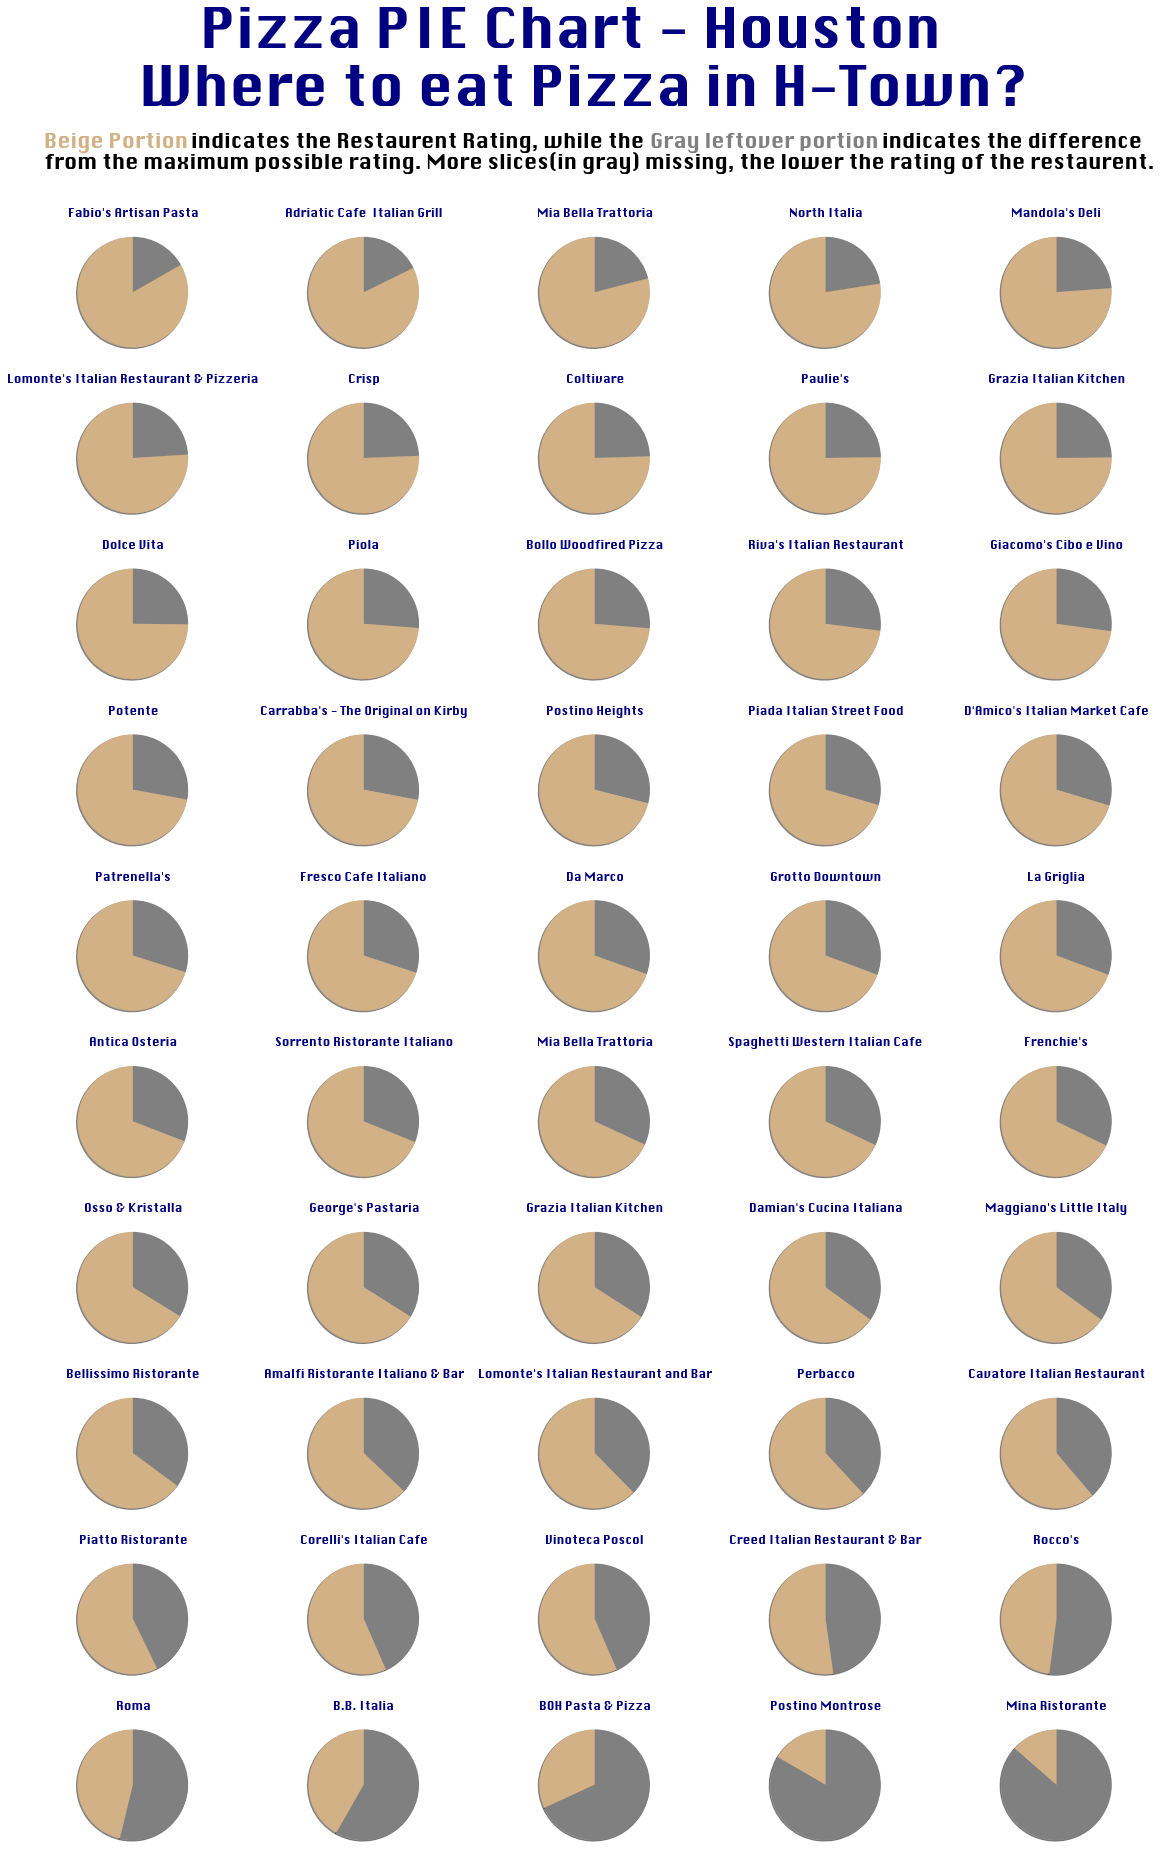

In [21]:
import matplotlib.pyplot as plt
import matplotlib.font_manager
import matplotlib.style as style
style.use('seaborn-darkgrid')

# Say, "the default sans-serif font is COMIC SANS"
matplotlib.rcParams['font.sans-serif'] = "Krungthep"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "Krungthep"

#rating = [4,3,2,5,2,3,4,2,3,5,4,1,2,3,4]
rating = df_data["wr"]
name = df_data["name"]
colors = ['gray','#D3B186']

row = 0
plt.figure(figsize=(350,350)) 
N = 15 # number of subplots you want
fig, ax1 = plt.subplots(10, 5)
fig.suptitle('Pizza PIE Chart - Houston \n Where to eat Pizza in H-Town?',color="navy", fontsize=54, fontweight='bold')
row = 0
index=0
while row < 10:     # the header for the outer loop
    col = 0
    while col < 5:   # the header for the inner loop
        sizes = [5-rating[index],rating[index]]
        ax1[row,col].pie(sizes,labels=['',''],colors=colors, autopct='',counterclock=False,shadow=True, startangle=90,textprops={'fontsize': 14})
        ax1[row,col].set_title(name[index],fontsize= 11.5,color="navy")
        col+= 1
        index+=1
    

    row+=1
fig = plt.gcf()
fig.set_size_inches(20,30)

fig.text(0.13, 0.915, "Beige Portion",color='#D3B186', fontsize=20)
fig.text(0.2325, 0.915, "indicates the Restaurent Rating, while the",color='Black', fontsize=20)
fig.text(0.551, 0.915, "Gray leftover portion",color='gray', fontsize=20)
fig.text(0.712, 0.915, "indicates the difference",color='black', fontsize=20)
fig.text(0.13, 0.905, "from the maximum possible rating. More slices(in gray) missing, the lower the rating of the restaurent.",color='black', fontsize=20)
plt.savefig('htown_pizza.png', bbox_inches='tight')
plt.show()